# LFW dataset Frontal-view

## plot dataset

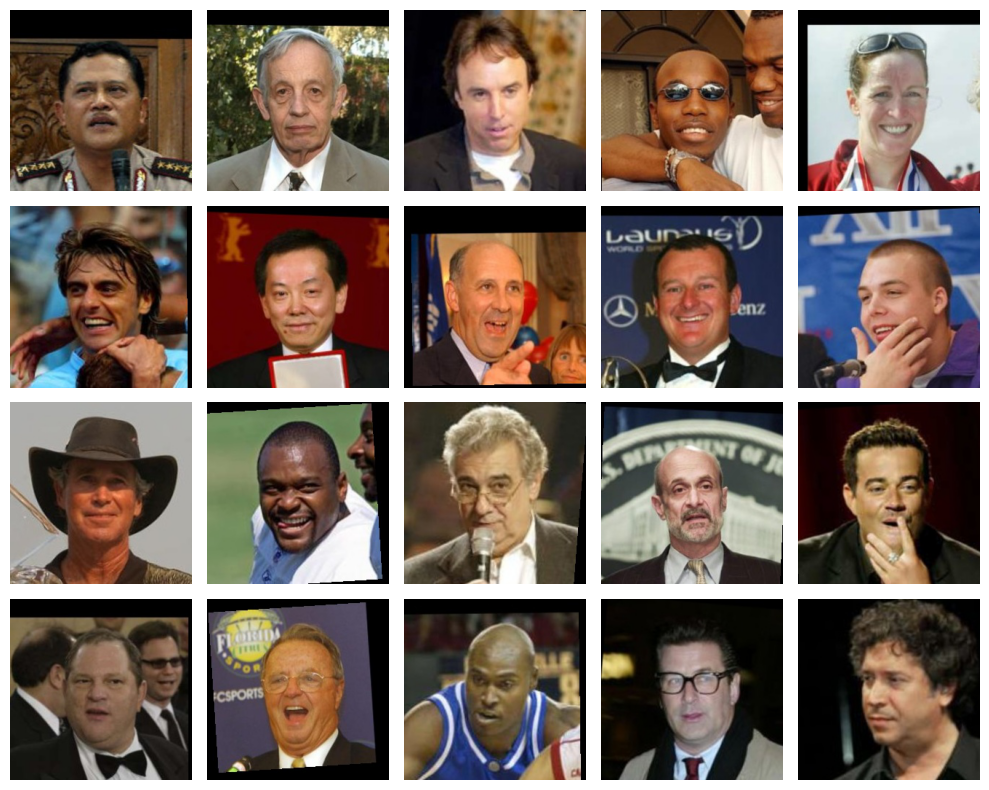

In [27]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

# Set the path to dataset
lfw_funneled_path = 'lfw_funneled'

# Get the list of subdirectories 
person_dirs = [os.path.join(lfw_funneled_path, name) for name in os.listdir(lfw_funneled_path) if os.path.isdir(os.path.join(lfw_funneled_path, name))]

# Set the number of images 
num_images = 20

# Create a new figure with multiple subplots
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(10, 8))

# Iterate over the first num_images images and plot them on the corresponding subplots
for i in range(num_images):
    # Select a random person from the dataset
    person_dir = random.choice(person_dirs)

    # Get the list of image filenames for the selected person
    image_filenames = [filename for filename in os.listdir(person_dir) if filename.endswith('.jpg')]

    # Select a random image from the list
    filename = random.choice(image_filenames)
    image_path = os.path.join(person_dir, filename)

    # Load the image using Pillow
    img = Image.open(image_path)

    # Plot the image on the corresponding subplot
    row = i // 5
    col = i % 5
    axes[row, col].imshow(img)
    # axes[row, col].set_title(os.path.basename(person_dir))
    axes[row, col].axis('off')

# Adjust the spacing of the figure
fig.tight_layout()

# Show the figure
plt.show()


## Detect faces and croping

In [43]:
import cv2
import os

# Original dataset path
path = "lfw_funneled"
# Croped dataset path
output_path = "dataset/lfw/"

if  os.path.exists(output_path)!=True:
    os.mkdir(output_path)

for person_folder in os.listdir(path):
    person_path = os.path.join(path, person_folder)
    if os.path.isdir(person_path):

        # Loop through subfolder
        for filename in os.listdir(person_path):
            if filename.endswith(".jpg") or filename.endswith(".png"):
                # Read image file
                image = cv2.imread(os.path.join(person_path, filename))

                # Convert the image to grayscale
                gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

                # Detect faces 
                face_cascade = cv2.CascadeClassifier('weights/haarcascade_frontalface_default.xml')
                faces = face_cascade.detectMultiScale(gray, scaleFactor=1.2, minNeighbors=5)

                # Crop the faces and save as a new file
                for (x,y,w,h) in faces:
                    cropped_image = image[y:y+h, x:x+w]
                    cropped_filename = f"{person_folder}_{filename}"
                    cv2.imwrite(os.path.join(f'{output_path}', cropped_filename), cropped_image)


# Resize images

In [1]:
import os
from PIL import Image

# Specify the folder path
folder_path = "dataset/lfw"

# Get a list of all the files in the folder
files = os.listdir(folder_path)

# Iterate over each file in the folder
for file in files:
    # Construct the full path of the file
    file_path = os.path.join(folder_path, file)
    
    # Open the image file
    image = Image.open(file_path)
    
    # Resize the image
    resized_image = image.resize((64, 64))
    
    # Save the resized image, overwriting the original file
    resized_image.save(file_path)


## ploting data

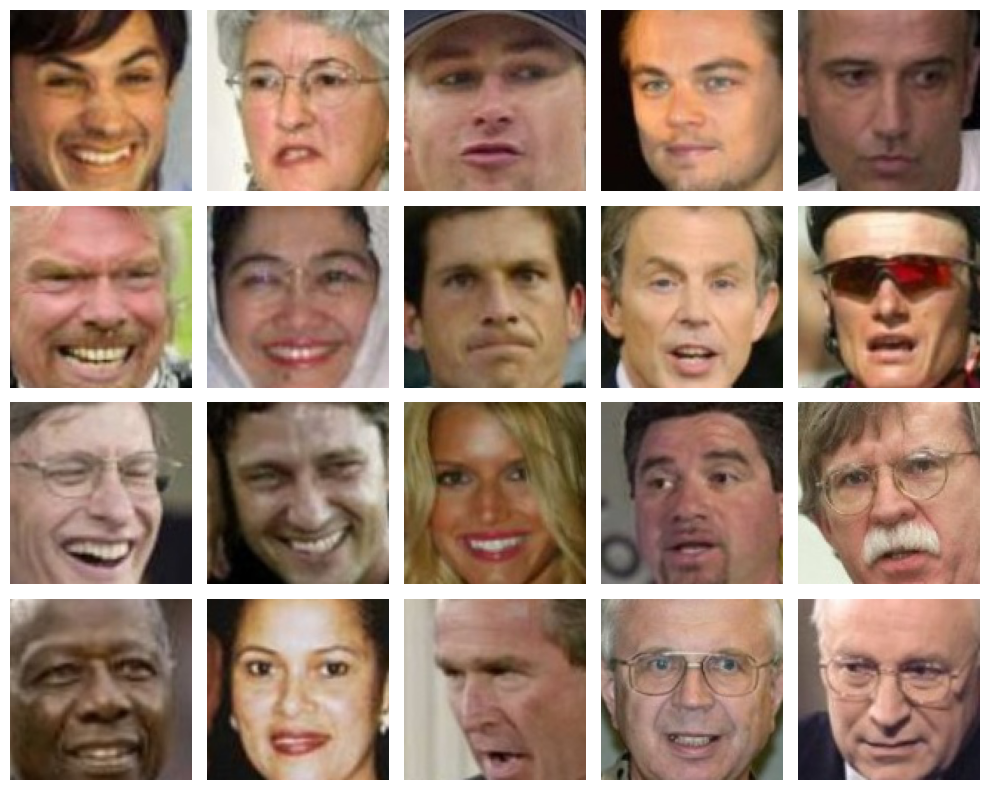

In [31]:
import os
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Set the path to the dataset
dataset_path = 'dataset/lfw'

# Get the list of image filenam
image_filenames = os.listdir(dataset_path)

# Set the number of images 
num_images = 20

# Create a subplots
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(10, 8))

for i in range(num_images):

    # Random image 
    filename = random.choice(image_filenames)
    
    # Load the image
    img_path = os.path.join(dataset_path, filename)
    img = Image.open(img_path)

    # Convert the image to a numpy array
    img_arr = np.asarray(img)

    # Plot the image on the corresponding subplot
    row = i // 5
    col = i % 5
    axes[row, col].imshow(img_arr)
    axes[row, col].axis('off')

# Adjust the spacing of the figure
fig.tight_layout()
plt.show()


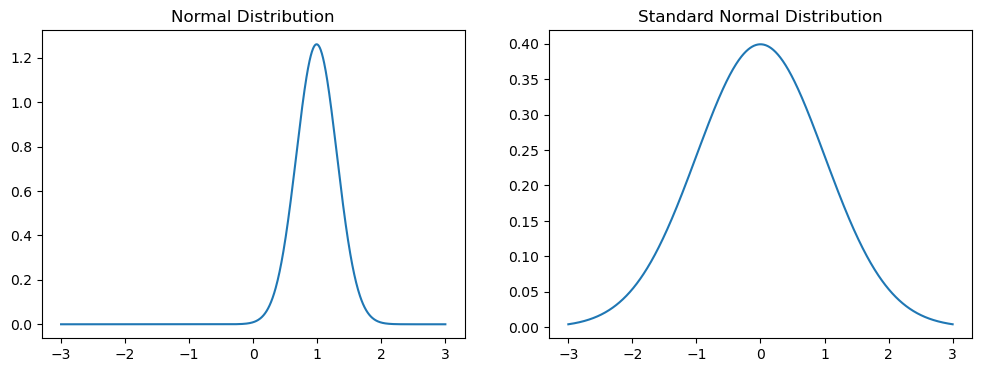

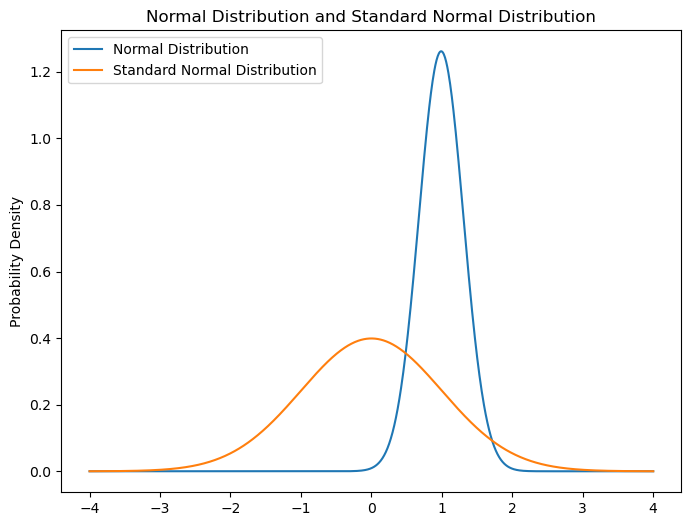